In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf

path = "C:\\pytest\\감성대화말뭉치\\"
data = pd.read_excel(path+"감성대화말뭉치(최종데이터)_Training.xlsx")
random_state = 1111

# 연령, 감정 모델 각각 만들기
data = data[['연령', '감정_대분류', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]
# data = data.fillna('')
data = data.rename(
    columns={'사람문장1': '사람문장', '사람문장2': '사람문장', '사람문장3': '사람문장', '사람문장4': '사람문장'})
col_data = pd.concat([data.iloc[:, [0, 1, 2]], data.iloc[:, [0, 1, 3]], data.iloc[:, [0, 1, 4]], data.iloc[:, [0, 1, 5]]], axis=0)
col_data.dropna(inplace=True)
col_data = col_data.reset_index()
col_data.drop('index', axis=1, inplace=True)


In [24]:
import rhinoMorph
rn = rhinoMorph.startRhino()

def morphed(text):
    tmp_list = rhinoMorph.onlyMorph_list(
        rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'MM', 'MAG', 'EF']) #ef, -ic
    return ' '.join(tmp_list)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [25]:
col_data['사람문장_형태소'] = col_data['사람문장'].apply(morphed)


In [47]:
col_data_senti = col_data.copy()
col_data

,연령,감정_대분류,사람문장,사람문장_형태소
0,청년,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아내 드디어 출산 되 정말 신 나
1,노년,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,당뇨 합병증 약이 가지 넘어가 스트레스
2,청소년,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 올라오 중학교 때 수업 갑자기 어렵 당황
3,노년,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 되 받 되 첫 월급 오 가족 외식 하 예정 야 너무 행복
4,노년,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚 드디어 다 갚 되 이제야 안도감 들
...,...,...,...,...
114284,노년,불안,미리 미리 건강 챙기고 모두 안 아팠으면 좋겠어.,미리 미리 건강 챙기 모두 안 아프 좋 어
114285,노년,당황,주변에 믿음직한 사람들에게서 정보도 많이 얻고 달콤한 말은 항상 의심하고 볼래.,주변 믿음직 사람 정보 많이 얻 달콤 말 항상 의심 보 ㄹ래
114286,노년,불안,친구들에게 내 마음을 터놓고 얘기하면 좀 나아질 것 같아.,친구 마음 터놓 이야기 좀 낫 같
114287,노년,당황,남편에게 이런 내 마음을 솔직하게 얘기해 봐야겠어.,남편 이런 마음 솔직 이야기 어


In [26]:
from sklearn.preprocessing import LabelEncoder

e_age = LabelEncoder()
e_age.fit(col_data.iloc[:, 0])
y_age = e_age.transform(col_data.iloc[:, 0])

e_senti = LabelEncoder()
# {'분노': 0, '기쁨': 1, '슬픔': 2, '당황': 3, '상처': 4, '불안': 5, '기쁨 ': 6, '불안 ': 7}
tmp = col_data.iloc[:, 1]
tmp = tmp.replace('기쁨 ', '기쁨')
tmp = tmp.replace('불안 ', '불안')
e_senti.fit(tmp)
y_senti = e_senti.transform(tmp)

In [27]:
from sklearn.model_selection import train_test_split
연령_X_pre, 연령_X_test, 연령_y_pre, 연령_y_test = train_test_split(
    col_data.iloc[:, -1], y_age, random_state=random_state, test_size=.3)
연령_X_train, 연령_X_validation, 연령_y_train, 연령_y_validation = train_test_split(
    연령_X_pre, 연령_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
연령_X_test = 연령_X_test[:3000]
연령_y_test = 연령_y_test[:3000]

감정_X_pre, 감정_X_test, 감정_y_pre, 감정_y_test = train_test_split(
    col_data.iloc[:, -1], y_senti, random_state=random_state, test_size=.3)
감정_X_train, 감정_X_validation, 감정_y_train, 감정_y_validation = train_test_split(
    감정_X_pre, 감정_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
감정_X_test = 감정_X_test[:3000]
감정_y_test = 감정_y_test[:3000]


In [28]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math

In [29]:
import numpy as np
text_len = [len(line.split(' ')) for line in 연령_X_train]
print('최소길이: ', np.min(text_len))
print('최대길이: ', np.max(text_len))
print('평균길이: ', np.round(np.mean(text_len), 1))
print('중간길이: ', np.median(text_len))
print('구간길이: ', np.percentile(text_len, [0, 25, 50, 75, 90, 100]))

최소길이:  1
최대길이:  32
평균길이:  8.4
중간길이:  8.0
구간길이:  [ 1.  6.  8. 10. 12. 32.]


In [30]:
max_words = 3000
maxlen = 20

In [31]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(연령_X_train)
word_index_age = tokenizer.word_index

In [32]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index_age))
print('word_index type: ', type(word_index_age))
# print('word_index: ', word_index)

전체에서 12139개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [33]:
data = tokenizer.texts_to_sequences(연령_X_train)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_train_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_train_data[0])
print(len(연령_X_train_data[0]))

최대문장길이:  29
최소문장길이:  0
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1562 1994   27  174    7]
20


In [34]:
data = tokenizer.texts_to_sequences(연령_X_validation)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_validation_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_validation_data[0])
print(len(연령_X_validation_data[0]))

최대문장길이:  24
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0   62 1693   17  101   78
  169  255 1437  574   79    4]
20


In [35]:
data = tokenizer.texts_to_sequences(연령_X_test)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_test_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_test_data[0])
print(len(연령_X_test_data[0]))

최대문장길이:  28
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 2303 1384 1634    2]
20


In [36]:
data = tokenizer.texts_to_sequences(감정_X_train)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_train_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_train_data[0])
print(len(감정_X_train_data[0]))

최대문장길이:  29
최소문장길이:  0
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1562 1994   27  174    7]
20


In [37]:
data = tokenizer.texts_to_sequences(감정_X_validation)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_validation_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_validation_data[0])
print(len(감정_X_validation_data[0]))

최대문장길이:  24
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0   62 1693   17  101   78
  169  255 1437  574   79    4]
20


In [38]:
data = tokenizer.texts_to_sequences(감정_X_test)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_test_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_test_data[0])
print(len(감정_X_test_data[0]))

최대문장길이:  28
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 2303 1384 1634    2]
20


In [39]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [40]:
class_number = 4

연령_y_train_one_hot_encoding = to_one_hot(연령_y_train, dimension=class_number)
연령_y_validation_one_hot_encoding = to_one_hot(연령_y_validation, dimension=class_number)
연령_y_test_one_hot_encoding = to_one_hot(연령_y_test, dimension=class_number)


In [41]:
class_number_senti = 6

감정_y_train_one_hot_encoding = to_one_hot(감정_y_train, dimension=class_number_senti)
감정_y_validation_one_hot_encoding = to_one_hot(감정_y_validation, dimension=class_number_senti)
감정_y_test_one_hot_encoding = to_one_hot(감정_y_test, dimension=class_number_senti)

In [42]:
# 연령_X_train_data = to_one_hot(연령_X_train_data, dimension=max_words)
# 연령_X_validation_data = to_one_hot(연령_X_validation_data, dimension=max_words)
# 연령_X_test_data = to_one_hot(연령_X_test_data, dimension=max_words)
# 감정_X_train_data = to_one_hot(감정_X_train_data, dimension=max_words)
# 감정_X_validation_data = to_one_hot(감정_X_validation_data, dimension=max_words)
# 감정_X_test_data = to_one_hot(감정_X_test_data, dimension=max_words)


In [45]:
연령_X_train_data.shape

(72001, 20)

In [46]:
epochs = 10
batch_size= 32
embedding_dim = 200
model_name= 'c:\\projects\\model\\221014\\train_data_morphed_embed_age.h5'
tokenizer_name= 'c:\\projects\\model\\221014\\train_data_morphed_embed_age.pickle'

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten()) 
model.add(Dense(64, activation='relu', input_shape=(연령_X_train_data.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=연령_y_train_one_hot_encoding.shape[1], activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='acc')

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=3)
cp_callback = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(연령_X_train_data, 연령_y_train_one_hot_encoding, epochs=epochs, batch_size=batch_size, validation_data=(연령_X_validation_data, 연령_y_validation_one_hot_encoding), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           600000    
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 64)                256064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 858,276
Trainable params: 858,276
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2247/2251 [============================

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Validation accuracy of each epoch: [0.615 0.618 0.614 0.614 0.611]


In [49]:
test_eval = model.evaluate(연령_X_test_data, 연령_y_test_one_hot_encoding)

94/94 [==============================] - 0s 4ms/step - loss: 0.9852 - acc: 0.5933


In [61]:
col_data_senti.감정_대분류.unique()

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처', '불안 '], dtype=object)

In [60]:
col_data_senti_filtered = col_data_senti[(col_data_senti.감정_대분류=='기쁨') | (col_data_senti.감정_대분류=='슬픔') | (col_data_senti.감정_대분류=='분노')]
col_data_senti_filtered.reset_index(drop=True, inplace=True)
col_data_senti_filtered

,연령,감정_대분류,사람문장_형태소
0,청년,기쁨,아내 드디어 출산 되 정말 신 나
1,노년,기쁨,재취업 되 받 되 첫 월급 오 가족 외식 하 예정 야 너무 행복
2,노년,기쁨,빚 드디어 다 갚 되 이제야 안도감 들
3,중년,슬픔,사십 접어들 머리카락 많이 빠지 고민 야
4,노년,분노,이제 돈 지긋지긋
...,...,...,...
57490,청소년,분노,유난 뜨 친구 보 필요 없 배드민턴 스트레스 풀 수 같
57491,노년,분노,가족 마음 털 기분 낫 것 아
57492,청소년,분노,공부 예체능 하 알아보 어
57493,청년,슬픔,친구 마음 상처 씻 죄책감 내려놓 수 있 좋 어


In [63]:
from sklearn.preprocessing import LabelEncoder

e_senti = LabelEncoder()
tmp = col_data_senti_filtered.iloc[:, 1]
e_senti.fit(tmp)
y_senti = e_senti.transform(tmp)

In [64]:
감정_X_pre, 감정_X_test, 감정_y_pre, 감정_y_test = train_test_split(
    col_data_senti_filtered.iloc[:, -1], y_senti, random_state=random_state, test_size=.3)
감정_X_train, 감정_X_validation, 감정_y_train, 감정_y_validation = train_test_split(
    감정_X_pre, 감정_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
감정_X_test = 감정_X_test[:3000]
감정_y_test = 감정_y_test[:3000]


In [65]:
import numpy as np
text_len = [len(line.split(' ')) for line in 감정_X_train]
print('최소길이: ', np.min(text_len))
print('최대길이: ', np.max(text_len))
print('평균길이: ', np.round(np.mean(text_len), 1))
print('중간길이: ', np.median(text_len))
print('구간길이: ', np.percentile(text_len, [0, 25, 50, 75, 90, 100]))

최소길이:  1
최대길이:  27
평균길이:  8.3
중간길이:  8.0
구간길이:  [ 1.  6.  8. 10. 12. 27.]


In [66]:
max_words = 3000
maxlen = 20

In [67]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(감정_X_train)
word_index_age = tokenizer.word_index

In [68]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index_age))
print('word_index type: ', type(word_index_age))
# print('word_index: ', word_index)

전체에서 9496개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>


In [69]:
data = tokenizer.texts_to_sequences(감정_X_train)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_train_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_train_data[0])
print(len(감정_X_train_data[0]))

최대문장길이:  27
최소문장길이:  0
[   0    0    0    0    0    0    0    0    0    0    0   64   19   17
    1 1050   51    5    1   13]
20


In [70]:
data = tokenizer.texts_to_sequences(감정_X_validation)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_validation_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_validation_data[0])
print(len(감정_X_validation_data[0]))

최대문장길이:  24
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  100 2887  258]
20


In [71]:
data = tokenizer.texts_to_sequences(감정_X_test)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_test_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_test_data[0])
print(len(감정_X_test_data[0]))

최대문장길이:  26
최소문장길이:  0
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20
   4 720]
20


In [76]:
np.unique(감정_y_train)

array([0, 1, 2])

In [77]:
class_number_senti = len(np.unique(감정_y_train))

감정_y_train_one_hot_encoding = to_one_hot(감정_y_train, dimension=class_number_senti)
감정_y_validation_one_hot_encoding = to_one_hot(감정_y_validation, dimension=class_number_senti)
감정_y_test_one_hot_encoding = to_one_hot(감정_y_test, dimension=class_number_senti)

In [78]:
epochs = 10
batch_size= 32
embedding_dim = 200
model_name= 'c:\\projects\\model\\221014\\train_data_morphed_embed_senti.h5'
tokenizer_name= 'c:\\projects\\model\\221014\\train_data_morphed_embed_senti.pickle'

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=감정_y_train_one_hot_encoding.shape[1], activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='acc')

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=3)
cp_callback = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(감정_X_train_data, 감정_y_train_one_hot_encoding, epochs=epochs, batch_size=batch_size, validation_data=(감정_X_validation_data, 감정_y_validation_one_hot_encoding), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 200)           600000    
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                256064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 858,243
Trainable params: 858,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1132/1132 [==========================

In [79]:
import pickle
with open(tokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Validation accuracy of each epoch: [0.67  0.678 0.667 0.659]


In [81]:
from keras.models import load_model
loaded_model_age = load_model(model_name)

with open(tokenizer_name, 'rb') as handle:
    loaded_tokenizer_age = pickle.load(handle)

In [83]:
test_eval = model.evaluate(감정_X_test_data, 감정_y_test_one_hot_encoding)

94/94 [==============================] - 0s 4ms/step - loss: 0.7910 - acc: 0.6923


In [ ]:
# 연령 분류

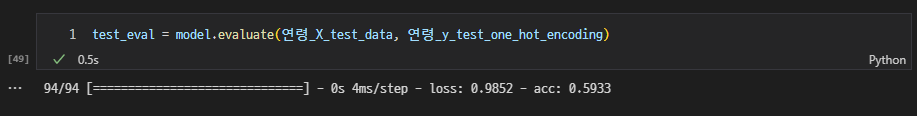

In [ ]:
# 감정 분류

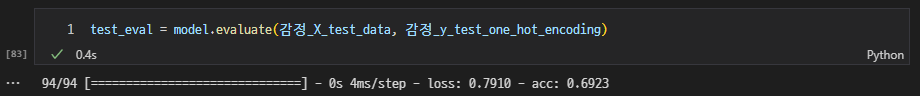

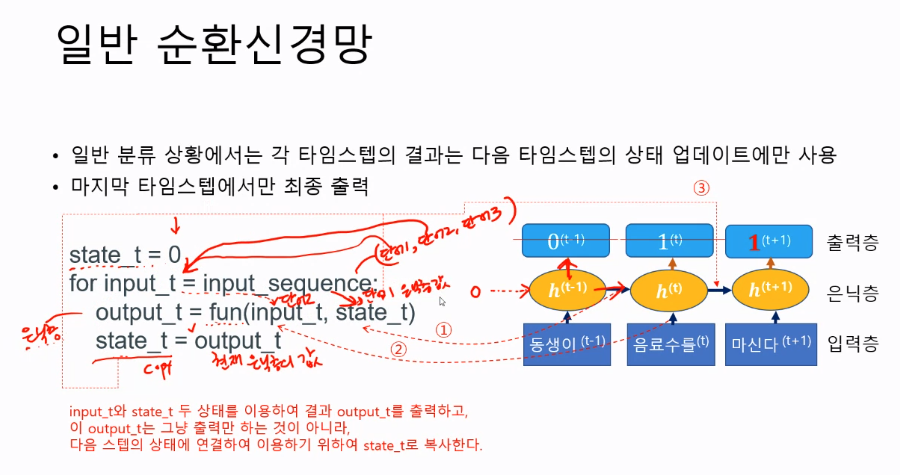